x_point: [-19000 -15000]
y_point: [-8500 -7400]
coefficients: [ 2.750e-01 -3.275e+03]
point: (x: -16090.909090909096, y: -7700)
point: (x: -17181.818181818187, y: -8000)
point: (x: -17545.45454545455, y: -8100)
point: (x: -17909.090909090915, y: -8200)
The slope angle is 15.376251248826188 degrees


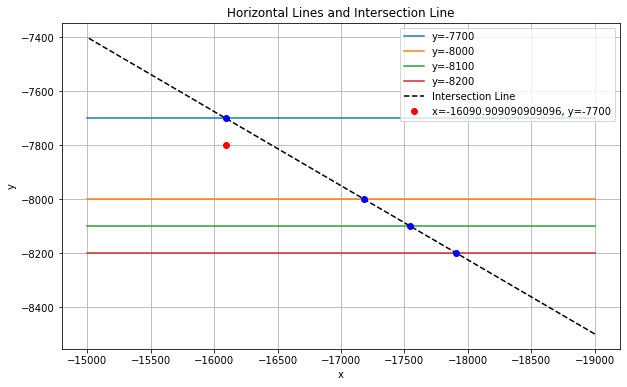

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Создайте диапазон значений x
x_values = np.linspace(-19000, -15000, 1000)  # 1000 точек от 10000 до 20000

# Задайте значения y для горизонтальных линий
y_values = [-7700, -8000, -8100, -8200]

# Определите координаты для прямой линии
x_point = np.array([-19000, -15000])
y_point = np.array([-8500, -7400])
print(f'x_point: {x_point}')
print(f'y_point: {y_point}')

# Вычислите коэффициенты для прямой линии
coefficients = np.polyfit(x_point, y_point, 1)
print(f'coefficients: {coefficients}')

# Вычислите значения y для прямой линии
y_line_values = np.polyval(coefficients, x_values)
#print(f'y_line_values: {y_line_values}')


### plt.show()
# Постройте график для каждой строки y
plt.figure(figsize=(10, 6))
for y in y_values:
    plt.plot(x_values, np.full_like(x_values, y), label=f'y={y}')

# Добавьте прямую линию
plt.plot(x_values, y_line_values, 'k--', label='Intersection Line')

# Найдите и добавьте точки пересечения
for y in y_values:
    x_intersect = (y - coefficients[1]) / coefficients[0]
    plt.plot(x_intersect, y, 'bo')  # 'ro' указывает на красные кружки
    print(f'point: (x: {x_intersect}, y: {y})')

y_intersection = y_values[0]
x_intersection = (y_intersection - coefficients[1]) / coefficients[0]

plt.plot(x_intersection, y_intersection - 100, 'ro', label=f'x={x_intersection}, y={y_intersection}')




# Вычисляем коэффициент наклона
m = coefficients[0]

# Вычисляем угол наклона в радианах
theta_rad = np.arctan(m)

# Преобразуем угол из радиан в градусы
theta_deg = np.degrees(theta_rad)

print(f'The slope angle is {theta_deg} degrees')

"""
# Пройдемся по парам y_values
for i in range(len(y_values)-1):
    # Выберите две точки для построения прямоугольного треугольника
    y1, y2 = y_values[i], y_values[i+1]
    print(f'y1: {y1}, y2: {y2}')

    # Рассчитайте координаты x для точек пересечения
    x1_intersect = (y1 - coefficients[1]) / coefficients[0]
    x2_intersect = (y2 - coefficients[1]) / coefficients[0]

    # Постройте прямоугольный треугольник
    plt.plot([x1_intersect, x2_intersect, x2_intersect, x1_intersect], 
             [y1, y1, y2, y1], 'b-')
    
    break;
"""    
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Horizontal Lines and Intersection Line')
plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()  # Инвертируем ось X
plt.show()